# Winequality dataset

## Feim els imports

In [170]:
#IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

## Preparam el dataset

Funció que separa les features i les etiquetes, escalant les dades

In [171]:
def load_data(df):
    y=df.quality
    X=df.drop('quality',axis=1)
    X = min_max_scaler.fit_transform(X)
    return X, y

Carregam els datasets a dos dataframes a partir dels fitxers csv: winequality-red.csv i winequality-white.csv

Afegim una nova columna que indiqui el tipus de vi a cada dataset i juntam els dos datasets en un de nou

In [172]:
#CREATE AND MERGE DATAFRAMES
dfRed=pd.read_csv("winequality-red.csv", sep=";")
dfWhite=pd.read_csv("winequality-white.csv", sep=";")

dfRed['type']="Red"
dfWhite['type']="White"
df=pd.concat([dfRed,dfWhite])

Consultam les files del dataframe amb valors absents i les eliminam

In [173]:
df[df.isna().any(axis=1)]
df.dropna(inplace=True)

Convertim els valors categòrics en númerics

In [174]:
labelencoder = LabelEncoder()

df['type']=labelencoder.fit_transform(df['type'])


Recolocam les columnes

In [175]:
df=df.reindex(columns=['fixed acidity', 'volatile acidity', 'citric acid', 
                       'residual sugar', 'chlorides', 'free sulfur dioxide',
                       'total sulfur dioxide', 'density', 'pH', 'sulphates', 
                       'alcohol', 'type', 'quality'])

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  type                  6497 non-null   int32  
 12  quality               6497 non-null   int64  
dtypes: float64(11), int32(1), int64(1)
memory usage: 685.2 KB


In [177]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,5


Mesclam el dataframe i carregam les dades a les variables *features* (característiques) i *labels* (etiquetes)

In [178]:
min_max_scaler = preprocessing.MinMaxScaler()
df = df.sample(frac=1)

features, labels = load_data(df)


### Separació del conjunt d'entrenament i el de test
Per separar les dades en els conjunts d'entrenament i de test hem emprat la funció train_test_split

Hem decidit emprar un 80% entrenament i un 20% de test ja que  amb un valor més baix d'entrenament el model de regressió logistica i el del perceptró presentaven underfiting 


In [179]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1)

## Visualització de les dades

Aquí podem observar les correlacions entre els distints atributs

<AxesSubplot:>

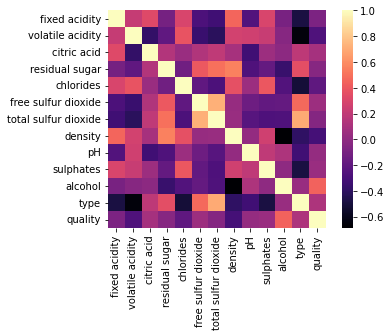

In [180]:
# dfwithoutType = df.drop('Type', 1)

corr = df.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        square=True,
        cmap="magma")


Graficam el valor que prenen les característiques númeriques del dataframe mitjançant un histograma

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

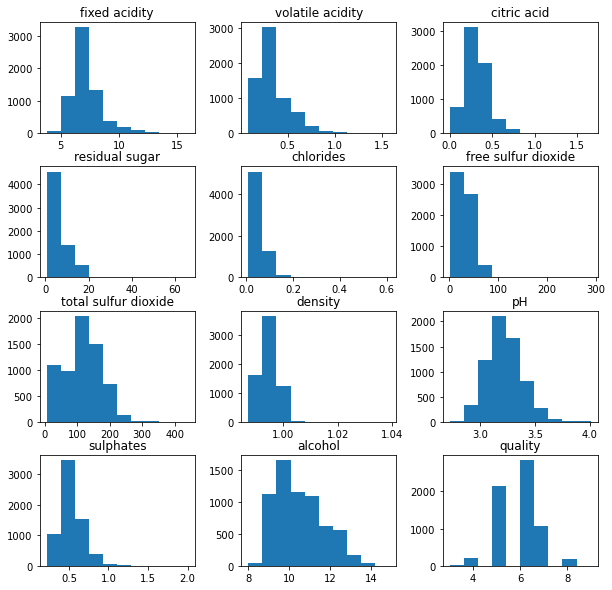

In [181]:
df.drop("type", axis=1).hist(figsize=(10,10), grid=False)


Gràfic cirular amb el que podem veure la proporció de vi blanc i vermell

1    75.388641
0    24.611359
Name: type, dtype: float64


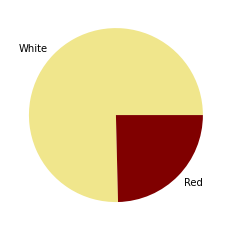

In [182]:
plt.pie(df['type'].value_counts(), labels = ["White","Red"], colors=["khaki","Maroon"])
print(df['type'].value_counts(normalize=True)*100)


# Classificadors

## Regressió Logística

Hem decidit donar-li valor al hiperparàmetre max_iters perquè amb el valor per defecte no arribava a convergir.

In [183]:
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train,y_train)

y_predict = logreg.predict(X_test)

print(classification_report(y_test, y_predict))

training_accuracy = logreg.score(X_train,y_train)
print('training_accuracy:',training_accuracy)

testing_accuracy = logreg.score(X_test,y_test)
print('testing_accuracy:',testing_accuracy)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        43
           5       0.61      0.59      0.60       456
           6       0.49      0.72      0.59       541
           7       0.47      0.15      0.23       209
           8       0.00      0.00      0.00        42
           9       0.00      0.00      0.00         1

    accuracy                           0.53      1300
   macro avg       0.22      0.21      0.20      1300
weighted avg       0.49      0.53      0.49      1300

training_accuracy: 0.5449297671733693
testing_accuracy: 0.5307692307692308


C:\Users\walli\miniconda3\envs\ml-environment\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\walli\miniconda3\envs\ml-environment\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\walli\miniconda3\envs\ml-environment\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

## Perceptró

In [184]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

y_predict=perceptron.predict(X_test)

print(classification_report(y_test, y_predict))

training_accuracy = perceptron.score(X_train,y_train)
print('training_accuracy:',training_accuracy)

testing_accuracy = perceptron.score(X_test,y_test)
print('testing_accuracy:',testing_accuracy)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        43
           5       0.54      0.75      0.63       456
           6       0.00      0.00      0.00       541
           7       0.26      0.84      0.40       209
           8       0.00      0.00      0.00        42
           9       0.00      0.00      0.00         1

    accuracy                           0.40      1300
   macro avg       0.11      0.23      0.15      1300
weighted avg       0.23      0.40      0.28      1300

training_accuracy: 0.3934962478352896
testing_accuracy: 0.3976923076923077


C:\Users\walli\miniconda3\envs\ml-environment\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\walli\miniconda3\envs\ml-environment\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\walli\miniconda3\envs\ml-environment\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

## Random Forest

Hem decidit donar-li valor al hiperparàmetre max_depth perquè amb el valor per defecte teniem overfitting.

In [185]:
rf = RandomForestClassifier(max_depth=14)
rf.fit(X_train, y_train)

y_predict=rf.predict(X_test)

print(classification_report(y_test, y_predict))

training_accuracy = rf.score(X_train,y_train)
print('training_accuracy:',training_accuracy)

testing_accuracy = rf.score(X_test,y_test)
print('testing_accuracy:',testing_accuracy)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.88      0.16      0.27        43
           5       0.74      0.73      0.74       456
           6       0.62      0.78      0.69       541
           7       0.66      0.46      0.54       209
           8       1.00      0.29      0.44        42
           9       0.00      0.00      0.00         1

    accuracy                           0.67      1300
   macro avg       0.56      0.35      0.38      1300
weighted avg       0.69      0.67      0.66      1300

training_accuracy: 0.977102174331345
testing_accuracy: 0.6715384615384615


C:\Users\walli\miniconda3\envs\ml-environment\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\walli\miniconda3\envs\ml-environment\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\walli\miniconda3\envs\ml-environment\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

## Conclusions
Blablabla

# Enginyeria de característiques

In [186]:
dfWquality=df.drop("quality", axis=1)

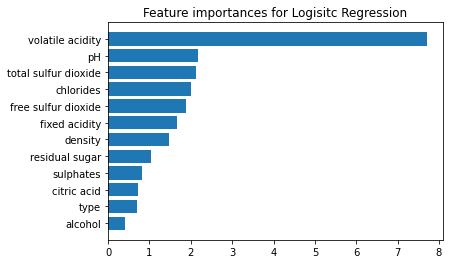

In [187]:
logreg_odds = np.exp(logreg.coef_[0])
indices=np.argsort(logreg_odds)

fig, ax = plt.subplots()
ax.set_title("Feature importances for Logisitc Regression")
ax.barh(range(len(logreg_odds)), logreg_odds[indices])
ax.set_yticks(range(len(logreg_odds)))
_ = ax.set_yticklabels(np.array(dfWquality.columns)[indices])

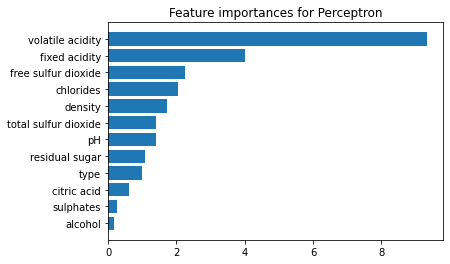

In [188]:
perceptron_odds = np.exp(perceptron.coef_[0])
indices=np.argsort(perceptron_odds)

fig, ax = plt.subplots()
ax.set_title("Feature importances for Perceptron")
ax.barh(range(len(perceptron_odds)), perceptron_odds[indices])
ax.set_yticks(range(len(perceptron_odds)))
_ = ax.set_yticklabels(np.array(dfWquality.columns)[indices])

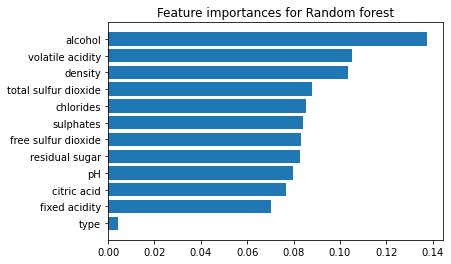

In [189]:
importancesRF = rf.feature_importances_
indices = np.argsort(importancesRF)

fig, ax = plt.subplots()
ax.set_title("Feature importances for Random forest")
ax.barh(range(len(importancesRF)), importancesRF[indices])
ax.set_yticks(range(len(importancesRF)))
_ = ax.set_yticklabels(np.array(dfWquality.columns)[indices])

In [207]:
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)

print(so[13:23]) #Les 12 primeres son autocorrelacions

free sulfur dioxide   total sulfur dioxide    0.720934
total sulfur dioxide  free sulfur dioxide     0.720934
type                  total sulfur dioxide    0.700357
total sulfur dioxide  type                    0.700357
density               alcohol                 0.686745
alcohol               density                 0.686745
volatile acidity      type                    0.653036
type                  volatile acidity        0.653036
residual sugar        density                 0.552517
density               residual sugar          0.552517
dtype: float64
